In [1]:
import pandas as pd
import numpy as np
import pdfplumber
import re
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
#test first page
pdf = pdfplumber.open("pdfs-2022-to-2023/2022-JUN-2023-JUN_COMPSTAT_High_Security.pdf")
first_page = pdf.pages[0]

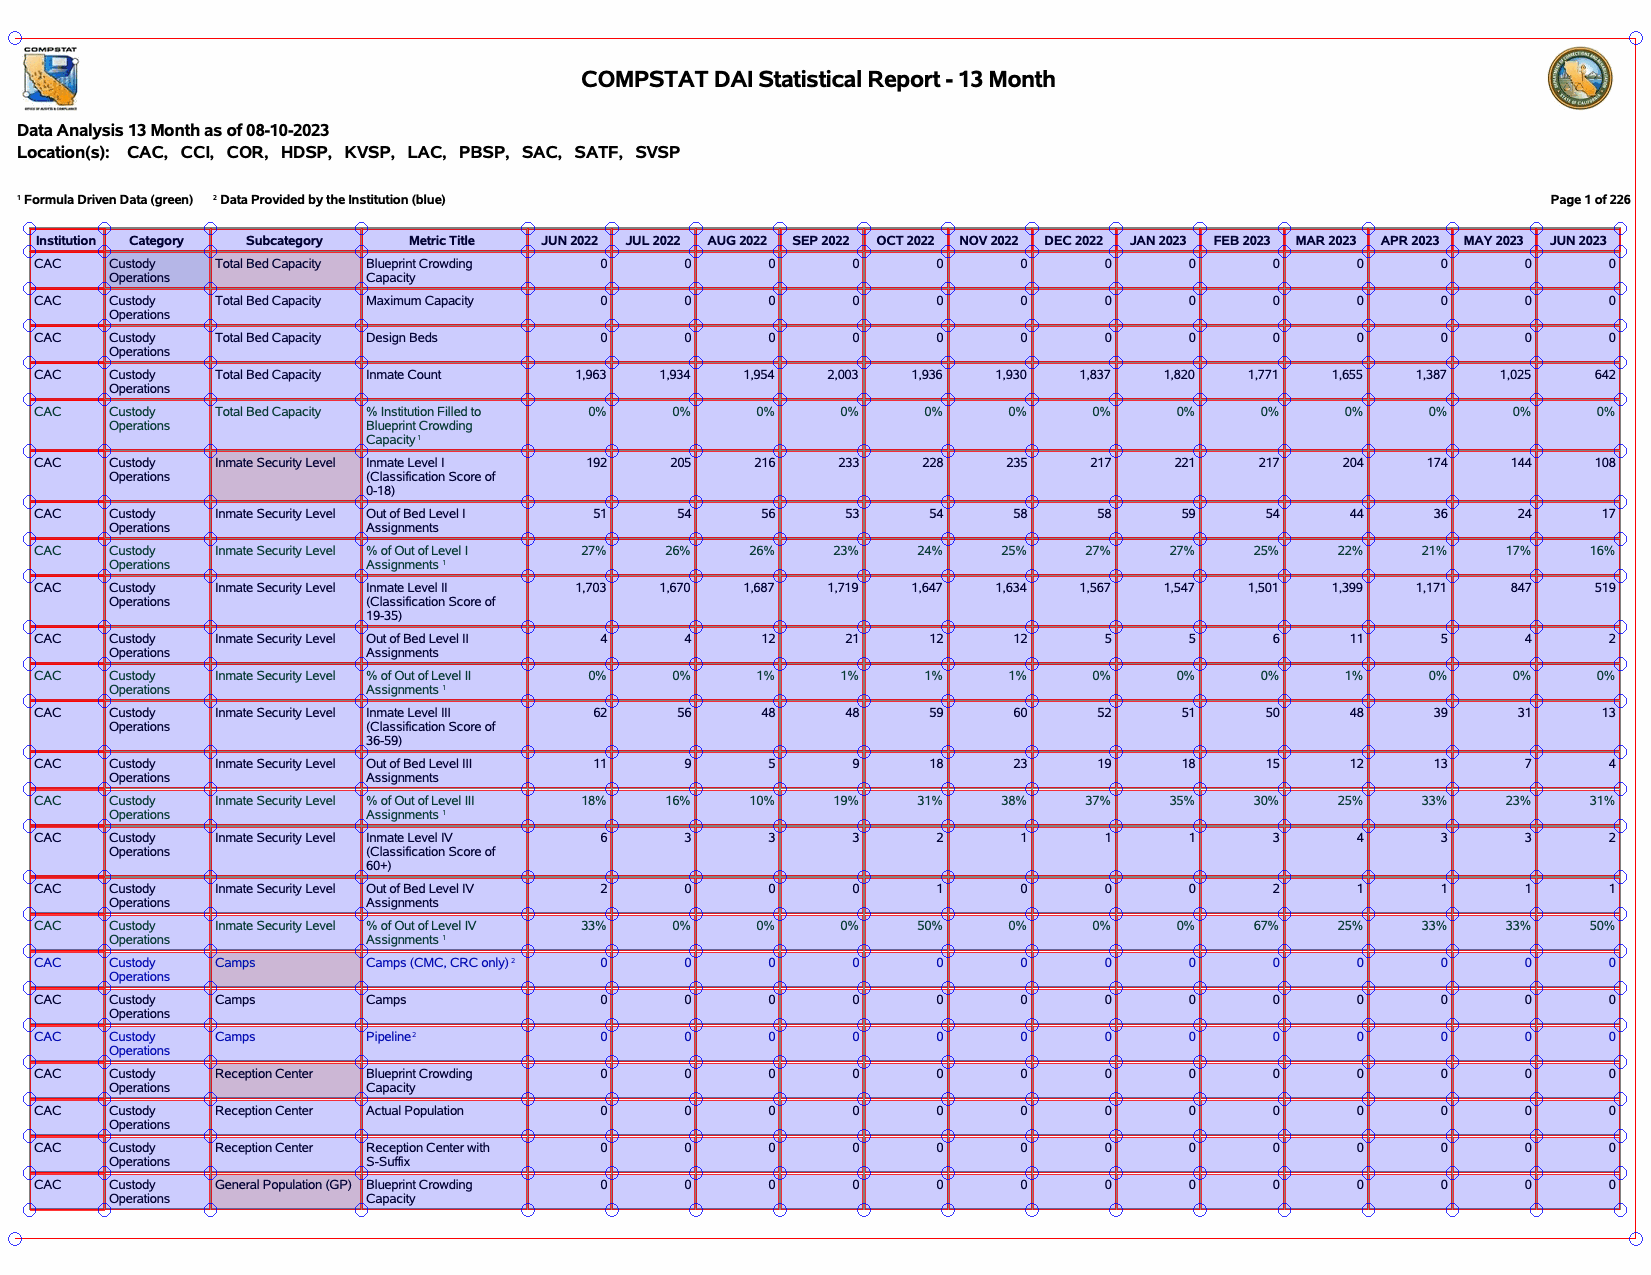

In [3]:
im = first_page.to_image(resolution=150)
im.reset().debug_tablefinder()

In [4]:
#Get the first row from the first page as headers
columns = first_page.extract_table()[0]

df = pd.DataFrame(columns=columns)

def parse_value(i, x):
    if x == "": return np.nan
    return x.replace(',', '').replace('\n', ' ')

def parse_row(row):
    return {columns[i]:parse_value(i, cell) for i, cell in enumerate(row)}

#loop through each page
for page in pdf.pages:
    table = page.extract_table()
    data  = [ parse_row(row) for row in table[1:] ]
    df    = pd.concat([df, pd.DataFrame(data)], ignore_index=True)

df

,Institution,Category,Subcategory,Metric Title,JUN 2022,JUL 2022,AUG 2022,SEP 2022,OCT 2022,NOV 2022,DEC 2022,JAN 2023,FEB 2023,MAR 2023,APR 2023,MAY 2023,JUN 2023
0,CAC,Custody Operations,Total Bed Capacity,Blueprint Crowding Capacity,0,0,0,0,0,0,0,0,0,0,0,0,0
1,CAC,Custody Operations,Total Bed Capacity,Maximum Capacity,0,0,0,0,0,0,0,0,0,0,0,0,0
2,CAC,Custody Operations,Total Bed Capacity,Design Beds,0,0,0,0,0,0,0,0,0,0,0,0,0
3,CAC,Custody Operations,Total Bed Capacity,Inmate Count,1963,1934,1954,2003,1936,1930,1837,1820,1771,1655,1387,1025,642
4,CAC,Custody Operations,Total Bed Capacity,% Institution Filled to Blueprint Crowding Cap...,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%,0%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5665,SVSP,Administration,Adverse Actions,Per 100 Staff 1,0.60,0.67,0.08,0.08,0.34,0.00,0.50,0.08,0.15,0.51,0.17,0.34,0.18
5666,SVSP,Administration,Adverse Actions,Dismissals (Non-Medical) 2,1,0,0,0,1,0,4,0,0,1,0,0,0
5667,SVSP,Administration,Adverse Actions,Adverse Actions Total (Medical) 2,3,0,0,1,0,0,0,0,0,0,0,1,0
5668,SVSP,Administration,Adverse Actions,Per 100 Staff 1,0.26,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.09,0.00


In [6]:
df_filtered = df[(df['Subcategory'] == 'Total Bed Capacity') & (df['Metric Title'] == 'Inmate Count')]
df_filtered.head()

,Institution,Category,Subcategory,Metric Title,JUN 2022,JUL 2022,AUG 2022,SEP 2022,OCT 2022,NOV 2022,DEC 2022,JAN 2023,FEB 2023,MAR 2023,APR 2023,MAY 2023,JUN 2023
3,CAC,Custody Operations,Total Bed Capacity,Inmate Count,1963,1934,1954,2003,1936,1930,1837,1820,1771,1655,1387,1025,642
570,CCI,Custody Operations,Total Bed Capacity,Inmate Count,3051,2998,2960,2957,2890,2806,2725,2651,2572,2383,2188,1937,1661
1137,COR,Custody Operations,Total Bed Capacity,Inmate Count,3466,3476,3433,3416,3323,3267,3387,3497,3484,3463,3403,3337,3389
1704,HDSP,Custody Operations,Total Bed Capacity,Inmate Count,1968,1859,1819,1770,2382,2331,2407,2123,2020,2352,2573,2562,2501
2271,KVSP,Custody Operations,Total Bed Capacity,Inmate Count,3045,2965,2878,2680,2611,2533,2485,2496,2481,2591,2685,2763,2793


In [29]:
df_melted = df_filtered.melt(id_vars=['Institution', 'Category', 'Subcategory','Metric Title'], var_name="Month", value_name="Value", ignore_index=True)
df_melted

,Institution,Category,Subcategory,Metric Title,Month,Value
0,CAC,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2022,1963
1,CCI,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2022,3051
2,COR,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2022,3466
3,HDSP,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2022,1968
4,KVSP,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2022,3045
...,...,...,...,...,...,...
125,LAC,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2023,2660
126,PBSP,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2023,1627
127,SAC,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2023,1759
128,SATF,Custody Operations,Total Bed Capacity,Inmate Count,JUN 2023,4598


In [30]:
df_melted['Year'] = df_melted['Month'].str.split(r'([A-Z]{3})\s(\d{4})').str[2]
df_melted['Month'] = df_melted['Month'].str.split(r'([A-Z]{3})\s(\d{4})').str[1].str.capitalize()
df_melted

,Institution,Category,Subcategory,Metric Title,Month,Value,Year
0,CAC,Custody Operations,Total Bed Capacity,Inmate Count,Jun,1963,2022
1,CCI,Custody Operations,Total Bed Capacity,Inmate Count,Jun,3051,2022
2,COR,Custody Operations,Total Bed Capacity,Inmate Count,Jun,3466,2022
3,HDSP,Custody Operations,Total Bed Capacity,Inmate Count,Jun,1968,2022
4,KVSP,Custody Operations,Total Bed Capacity,Inmate Count,Jun,3045,2022
...,...,...,...,...,...,...,...
125,LAC,Custody Operations,Total Bed Capacity,Inmate Count,Jun,2660,2023
126,PBSP,Custody Operations,Total Bed Capacity,Inmate Count,Jun,1627,2023
127,SAC,Custody Operations,Total Bed Capacity,Inmate Count,Jun,1759,2023
128,SATF,Custody Operations,Total Bed Capacity,Inmate Count,Jun,4598,2023


In [31]:
df_finished = df_melted.drop(columns=['Category','Subcategory','Metric Title']).rename(columns={'Value':'Inmate Count'})
df_finished

,Institution,Month,Inmate Count,Year
0,CAC,Jun,1963,2022
1,CCI,Jun,3051,2022
2,COR,Jun,3466,2022
3,HDSP,Jun,1968,2022
4,KVSP,Jun,3045,2022
...,...,...,...,...
125,LAC,Jun,2660,2023
126,PBSP,Jun,1627,2023
127,SAC,Jun,1759,2023
128,SATF,Jun,4598,2023


In [34]:
df_finished = df_finished[['Institution','Year','Month','Inmate Count']]
df_finished

,Institution,Year,Month,Inmate Count
0,CAC,2022,Jun,1963
1,CCI,2022,Jun,3051
2,COR,2022,Jun,3466
3,HDSP,2022,Jun,1968
4,KVSP,2022,Jun,3045
...,...,...,...,...
125,LAC,2023,Jun,2660
126,PBSP,2023,Jun,1627
127,SAC,2023,Jun,1759
128,SATF,2023,Jun,4598


In [35]:
df_finished.to_csv("finished-csvs/finished-2022-2023-POPULATION.csv", encoding="utf-8", index=False)